# Exercises
Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

1. Load the tips dataset from either pydataset or seaborn.

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

3. Plot the residuals for the linear regression model that you made.

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7. What is the amount of variance explained in your model?

8. Is your model better than the baseline model?

9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import math

from pydataset import data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load tips dataset from pydata or seaborn
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
# Fit a linear regresion model (ordinary least squares) and compute yhat, predictions of tip using total_bill

model = LinearRegression().fit(df[['total_bill']], df.tip)
predictions = model.predict(df[['total_bill']])
df['yhat'] = predictions

In [6]:
df['baseline'] = df.tip.mean()
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279


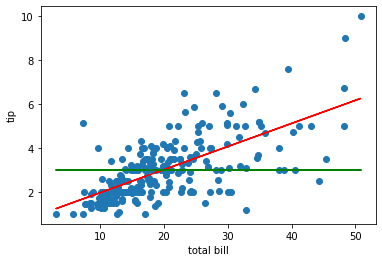

In [7]:
plt.scatter(df.total_bill, df.tip)
plt.plot(df.total_bill, df.yhat, color='r')
plt.plot(df.total_bill, df.baseline, color='g')
plt.xlabel('total bill')
plt.ylabel('tip')
plt.show()

In [8]:
# Plot the residuals for the linear regression model that you made.
df['residual'] = df.tip - df.yhat
df['baseline_residual'] = df.tip - df.baseline
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721


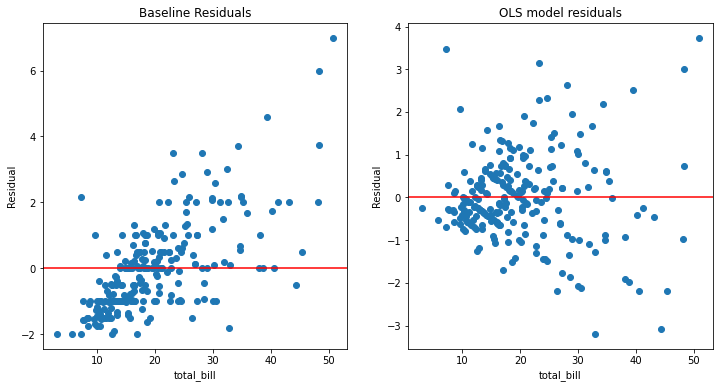

In [9]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.scatter(df.total_bill, df.baseline_residual)
plt.axhline(y = 0, color='r' , ls = '-')
plt.xlabel('total_bill')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(df.total_bill, df.residual)
plt.axhline(y = 0, color='r' , ls = '-')
plt.xlabel('total_bill')
plt.ylabel('Residual')
plt.title('OLS model residuals');

In [10]:
# Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.
SSE = (df.residual**2).sum()
ESS = sum((df.yhat - df.baseline)**2)
TSS = ESS + SSE
MSE = SSE/len(df)
RMSE = mean_squared_error(df.tip, df.yhat, squared=False)
print(f'SSE = {SSE}')
print(f'ESS = {ESS}')
print(f'TSS = {TSS}')
print(f'MSE = {MSE}')
print(f'RMSE = {RMSE} ')



SSE = 252.788743850776
ESS = 212.42373319840416
TSS = 465.21247704918017
MSE = 1.036019442011377
RMSE = 1.0178504025697377 


In [11]:
# Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).
SSE_baseline = (df.baseline_residual**2).sum()
MSE_baseline = SSE_baseline/len(df)
RMSE_baseline = mean_squared_error(df.tip, df.baseline, squared=False)
print(f'SSE Baseline = {SSE_baseline}')
print(f'MSE Baseline = {MSE_baseline}')
print(f'RMSE Baseline = {RMSE_baseline} ')

SSE Baseline = 465.2124770491804
MSE Baseline = 1.906608512496641
RMSE Baseline = 1.3807999538298954 


In [12]:
# Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model 
# and outputs whether or not your model performs better than the baseline model.
eval_df = pd.DataFrame(np.array(['SSE', 'MSE','RMSE']), columns=['metric'])
eval_df['model_error'] = np.array([SSE,  MSE, RMSE])
eval_df['baseline_error'] = np.array([SSE_baseline,MSE_baseline, RMSE_baseline])
eval_df['better_than_baseline'] = eval_df.baseline_error > eval_df.model_error
eval_df

,metric,model_error,baseline_error,better_than_baseline
0,SSE,252.788744,465.212477,True
1,MSE,1.036019,1.906609,True
2,RMSE,1.017850,1.380800,True


In [13]:
# What is the amount of variance explained in your model?
r2_score(df.tip, df.yhat)
print(f'Variance Explained : {r2_score(df.tip, df.yhat):.2%}')

Variance Explained : 45.66%


In [14]:
# Is your model better than the baseline model?
print(f'Yes because:\n {eval_df}')

Yes because:
   metric  model_error  baseline_error  better_than_baseline
0    SSE   252.788744      465.212477                  True
1    MSE     1.036019        1.906609                  True
2   RMSE     1.017850        1.380800                  True


In [15]:
# Create a file named evaluate.py that contains the following functions...
import evaluate

In [16]:
# Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. 
# Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. 
# Use the functions from your evaluate.py to help accomplish this.

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [17]:
mpg_model = LinearRegression().fit(mpg[['displ']], mpg.hwy)
predictions = mpg_model.predict(mpg[['displ']])

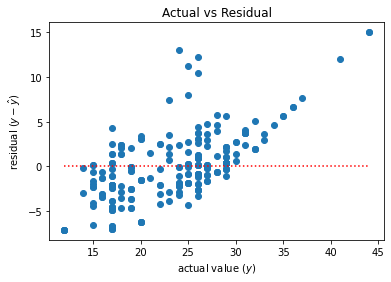

In [18]:
evaluate.plot_residuals(mpg.hwy, predictions)

In [19]:
evaluate.regression_errors(mpg.hwy, predictions)

SSE     3413.829009
ESS     4847.833384
TSS     8261.662393
MSE       14.589013
RMSE       3.819557
dtype: float64

In [20]:
evaluate.baseline_mean_errors(mpg.hwy)

SSE     8261.662393
MSE       35.306250
RMSE       5.941906
dtype: float64

In [21]:
evaluate.better_than_baseline(mpg.hwy, predictions)

True